In [1]:
import torch
import random
from tqdm import tqdm
from torch.utils.data import Dataset
import math
import pandas as pd #only used for viewing the datset
import numpy as np
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE" ## since my kernel always breaks down suddenly , I have to add this line

In [2]:
class juliaDataSet: 


    def __init__(self,  x_center=0.,y_center=0.,semi_width=1.5,size = 600, max_depth = 10,origin_c=0.4):
        ## N = size * size elements, default is a N= 600 * 600 =360000 elements set.
        self.size = size      
        self.max_depth = max_depth
        self.outputs = []
        self.x_from,self.x_to,self.y_from,self.y_to = x_center-semi_width,x_center+semi_width,\
                          y_center-semi_width,y_center+semi_width
        self.origin_c=origin_c
        
        ## np.ogrid() is similar to np.linspace() but return two-dimensional array
        self.y,self.x = np.ogrid[self.y_from:self.y_to:self.size*1j,self.x_from:self.x_to:self.size*1j]
        
        ## the value of matrix c is complex, and size of c is size * size, default is 600*600
        self.z = self.x + self.y*1j
        print("z.shape:",self.z.shape,"x.shape:",self.x.shape,"y.shape:",self.y.shape)
        
        ## a two dimensional matrix with length and width eaqual to self.size
        self.outputs=np.frompyfunc(self.f,2,1)(self.z,self.origin_c).astype(np.float)
        
                    
    
    def f(self,z, origin_c):
        """ Itterates up to max depth to check if a complex number belongs to the julia set or not."""

        ## The maximum escape time is max_depth-1 
        for n in range(1, self.max_depth):
            if abs(z) > 2: ## if >2 , regard as escape
                break 
            z = pow(z, 3)+origin_c
        return n ## the iterate times is used to map colors
    


    def get_X_and_Y(self):
        
        xc=np.squeeze(self.z.real.reshape(1,-1))## get real part and reshape to a vector
        yc=np.squeeze(self.z.imag.reshape(1,-1))## get imaginary part and reshape to a vector
        color=np.squeeze(self.outputs.reshape(1,-1))
        label=(color==self.max_depth-1)
        return np.array(list(zip(xc,yc))),label,color
            
    def view(self):
        dataframe = pd.DataFrame(data = [], columns = ["x","y", "Belongs?","color"])
        xc=np.squeeze(self.z.real.reshape(1,-1))## get real part and reshape to a vector
        yc=np.squeeze(self.z.imag.reshape(1,-1))## get imaginary part and reshape to a vector
        dataframe.x=xc
        dataframe.y=yc
        color=np.squeeze(self.outputs.reshape(1,-1))# get outputs and reshape to a vector
        dataframe.color=color
        dataframe["Belongs?"]= (color==self.max_depth-1)

        return dataframe       
            
                

In [3]:
julia=juliaDataSet()

z.shape: (600, 600) x.shape: (1, 600) y.shape: (600, 1)


C:\Users\Jerry Yuan\AppData\Local\Temp\ipykernel_4064\2479142914.py:21: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.outputs=np.frompyfunc(self.f,2,1)(self.z,self.origin_c).astype(np.float)


In [4]:
julia.view()

,x,y,Belongs?,color
0,-1.500000,-1.5,False,1.0
1,-1.494992,-1.5,False,1.0
2,-1.489983,-1.5,False,1.0
3,-1.484975,-1.5,False,1.0
4,-1.479967,-1.5,False,1.0
...,...,...,...,...
359995,1.479967,1.5,False,1.0
359996,1.484975,1.5,False,1.0
359997,1.489983,1.5,False,1.0
359998,1.494992,1.5,False,1.0


In [5]:
t=julia.view()
sum(t["Belongs?"])/360000

0.3194722222222222

In [6]:
X, Y,Color = julia.get_X_and_Y() 
X,Y,Color

(array([[-1.5       , -1.5       ],
        [-1.49499165, -1.5       ],
        [-1.48998331, -1.5       ],
        ...,
        [ 1.48998331,  1.5       ],
        [ 1.49499165,  1.5       ],
        [ 1.5       ,  1.5       ]]),
 array([False, False, False, ..., False, False, False]),
 array([1., 1., 1., ..., 1., 1., 1.]))

In [7]:
"""
you can use the code below to generate any mandelbrot set image, just provide a 'ds' argument, the 'ds'
argument is a square matrix, same to the outputs of the mandelbrotDataSet. You can also use the 'mandelbrotDataSetInstance'.outputs
to generate the image.
""" 

from matplotlib import cm
from matplotlib import pyplot as plt

class Para: ## A Para class with only a name is used to store global parameters
    pass


para = Para()
## You can change the color of the image by changing the idxColorMap
para.idxColorMap = 1
## the total color type is in cmaps list
para.cmaps = [ 'ocean', 'gist_earth', 'terrain', 'gist_stern',
         'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg','gist_rainbow',
         'rainbow', 'jet', 'nipy_spectral', 'gist_ncar']


def drawImage(ds,cmaps):
    para.fig = plt.figure(figsize=(12,6),dpi=100)
    para.ax0 = plt.subplot(121)
    para.ax0.set_axis_off()## Hide the coordinates of the subgraph
    c = cm.get_cmap(cmaps[para.idxColorMap%len(cmaps)])
    ## The cmap function inside imshow() corresponds to a color map object, which is responsible for converting the value of the 
    ## element (i.e., the escape time of the complex c) to the corresponding color.
    para.ax0.imshow(ds,cmap=c)


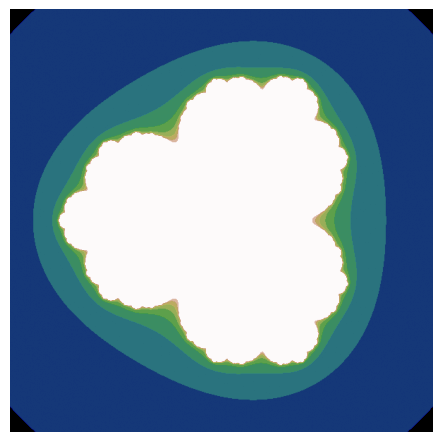

In [8]:
## ds = dataset.outputs
drawImage(julia.outputs,para.cmaps)

In [16]:
X_train, X_test = X[:math.ceil(X.shape[0] * 0.8)], X[math.ceil(X.shape[0] * 0.8):]
Y_train, Y_test = Y[:math.ceil(Y.shape[0] * 0.8)], Y[math.ceil(Y.shape[0] * 0.8):]
Color_train, Color_test = Color[:math.ceil(Y.shape[0] * 0.8)], Color[math.ceil(Y.shape[0] * 0.8):]

In [10]:
import tensorflow as tf
from tensorflow import keras

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape  = [2, 1])) 
model.add(keras.layers.Dense(300, activation = "relu")) 
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))  # same to the max_depth 

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 2)                 0         
                                                                 
 dense_3 (Dense)             (None, 300)               900       
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 32,010
Trainable params: 32,010
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"]) #learwning rate defaults to 0.01

In [17]:
history = model.fit(X_train, Color_train, epochs = 50, validation_data = (X_test, Color_test))

Epoch 1/50
9000/9000 [==============================] - 13s 1ms/step - loss: 0.6208 - accuracy: 0.8264 - val_loss: 0.7526 - val_accuracy: 0.7695
Epoch 2/50
9000/9000 [==============================] - 12s 1ms/step - loss: 0.3394 - accuracy: 0.9064 - val_loss: 0.6989 - val_accuracy: 0.7971
Epoch 3/50
9000/9000 [==============================] - 12s 1ms/step - loss: 0.2612 - accuracy: 0.9253 - val_loss: 0.7722 - val_accuracy: 0.7993
Epoch 4/50
9000/9000 [==============================] - 12s 1ms/step - loss: 0.2245 - accuracy: 0.9342 - val_loss: 0.7636 - val_accuracy: 0.8212
Epoch 5/50
9000/9000 [==============================] - 12s 1ms/step - loss: 0.2017 - accuracy: 0.9396 - val_loss: 0.7466 - val_accuracy: 0.8407
Epoch 6/50
9000/9000 [==============================] - 12s 1ms/step - loss: 0.1854 - accuracy: 0.9426 - val_loss: 0.7989 - val_accuracy: 0.8428
Epoch 7/50
9000/9000 [==============================] - 12s 1ms/step - loss: 0.1727 - accuracy: 0.9450 - val_loss: 0.8069 - val_ac

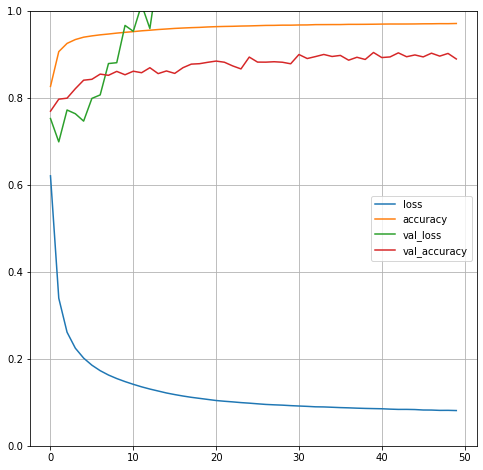

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize = (8, 8))

plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [20]:
model.evaluate(X_test, Color_test) # returns (loss, accuracy)

2250/2250 [==============================] - 2s 899us/step - loss: 1.2831 - accuracy: 0.8895


[1.2831165790557861, 0.8894861340522766]

In [21]:
new_dataset = dataset = juliaDataSet() 
X,Label,Color = dataset.get_X_and_Y()

predictions = model.predict(X)
predictions_as_classes = np.argmax(predictions, axis=1)
predictions_as_classes

z.shape: (600, 600) x.shape: (1, 600) y.shape: (600, 1)


C:\Users\Jerry Yuan\AppData\Local\Temp\ipykernel_4064\2479142914.py:21: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.outputs=np.frompyfunc(self.f,2,1)(self.z,self.origin_c).astype(np.float)


11250/11250 [==============================] - 9s 756us/step


array([1, 1, 1, ..., 2, 2, 2], dtype=int64)

In [22]:
predictions_as_classes.reshape(600,-1)

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]], dtype=int64)

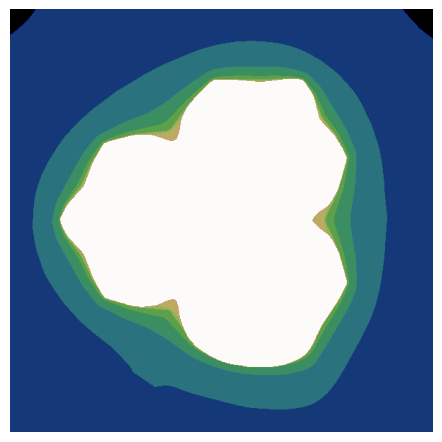

In [23]:
drawImage(predictions_as_classes.reshape(600,-1),para.cmaps)